In [1]:
import tensorflow as tf

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np


In [2]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/irish-lyrics-eof.txt \
    -O /tmp/irish-lyrics-eof.txt

--2021-12-23 20:32:16--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/irish-lyrics-eof.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.141.128, 2607:f8b0:4023:c0b::80
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.141.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68970 (67K) [text/plain]
Saving to: ‘/tmp/irish-lyrics-eof.txt’

/tmp/irish-lyrics-e 100%[===================>]  67.35K  --.-KB/s    in 0.006s  

2021-12-23 20:32:16 (10.4 MB/s) - ‘/tmp/irish-lyrics-eof.txt’ saved [68970/68970]



In [6]:
tokenizer = Tokenizer()
data = open('/tmp/irish-lyrics-eof.txt').read()

corpus = data.lower().split("\n") #getting each line splitted from the data and stored in a list named corpus

tokenizer.fit_on_texts(corpus) 
total_words = len(tokenizer.word_index) + 1 # adding 1 since we might wanna include zero --that is used as Out of Vocabulary (OOV) encoding for padding

print(tokenizer.word_index)
print(total_words)

{'the': 1, 'and': 2, 'i': 3, 'to': 4, 'a': 5, 'of': 6, 'my': 7, 'in': 8, 'me': 9, 'for': 10, 'you': 11, 'all': 12, 'was': 13, 'she': 14, 'that': 15, 'on': 16, 'with': 17, 'her': 18, 'but': 19, 'as': 20, 'when': 21, 'love': 22, 'is': 23, 'your': 24, 'it': 25, 'will': 26, 'from': 27, 'by': 28, 'they': 29, 'be': 30, 'are': 31, 'so': 32, 'he': 33, 'old': 34, 'no': 35, 'oh': 36, 'ill': 37, 'at': 38, 'one': 39, 'his': 40, 'there': 41, 'were': 42, 'heart': 43, 'down': 44, 'now': 45, 'we': 46, 'where': 47, 'young': 48, 'never': 49, 'go': 50, 'come': 51, 'then': 52, 'did': 53, 'not': 54, 'said': 55, 'away': 56, 'their': 57, 'sweet': 58, 'them': 59, 'green': 60, 'if': 61, 'take': 62, 'our': 63, 'like': 64, 'night': 65, 'day': 66, 'o': 67, 'out': 68, 'fair': 69, 'this': 70, 'town': 71, 'have': 72, 'can': 73, 'true': 74, 'its': 75, 'thou': 76, 'see': 77, 'dear': 78, 'more': 79, 'theres': 80, 'or': 81, 'had': 82, 'would': 83, 'over': 84, 'hear': 85, 'up': 86, 'ive': 87, 'through': 88, 'home': 89, '

In [11]:
input_sequences = []
for line in corpus:
  token_list = tokenizer.texts_to_sequences([line])[0] # addding subscript zero as otherwise it will give [[]] dimension array
  for i in range(1,len(token_list)):
    n_gram_sequence = token_list[:i+1] # making n gram sequence with token sequences above
    input_sequences.append(n_gram_sequence)
  
# padding the ngrams created above
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences,maxlen=max_sequence_len,padding='pre'))


#Taking the last column to be label and the rest as x
xs, labels = input_sequences[:,:-1] , input_sequences[:,-1]

#one hot encoding the label with respect to total no of classes = total_words
ys = tf.keras.utils.to_categorical(labels,num_classes=total_words)

In [15]:
print(tokenizer.word_index['town'])
print(xs[23])

71
[  0   0   0   0   0   0   0   0   0   0 118  35 119 799  56]


In [ ]:
model = Sequential()
model.add(Embedding(total_words,100,input_length=max_sequence_len-1)) #-1 because our x has data - label column
model.add(Bidirectional(LSTM(150)))
model.add(Dense(total_words,activation='softmax'))
adam = Adam(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
history = model.fit(xs,ys,epochs=100,verbose=1)
print(model)


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/100
377/377 [==============================] - 40s 90ms/step - loss: 6.6246 - accuracy: 0.0763
Epoch 2/100
377/377 [==============================] - 21s 56ms/step - loss: 5.7161 - accuracy: 0.1162
Epoch 3/100
377/377 [==============================] - 21s 55ms/step - loss: 4.7832 - accuracy: 0.1692
Epoch 4/100
377/377 [==============================] - 20s 54ms/step - loss: 3.8725 - accuracy: 0.2374
Epoch 5/100
377/377 [==============================] - 21s 55ms/step - loss: 3.0350 - accuracy: 0.3465
Epoch 6/100
377/377 [==============================] - 21s 56ms/step - loss: 2.3385 - accuracy: 0.4706
Epoch 7/100
377/377 [==============================] - 22s 58ms/step - loss: 1.8640 - accuracy: 0.5639
Epoch 8/100
377/377 [==============================] - 21s 55ms/step - loss: 1.5503 - accuracy: 0.6288
Epoch 9/100
377/377 [==============================] - 21s 56ms/step - loss: 1.3475 - accuracy: 0.6738
Epoch 10/100
377/377 [==============================] - 21s 55ms/step - l

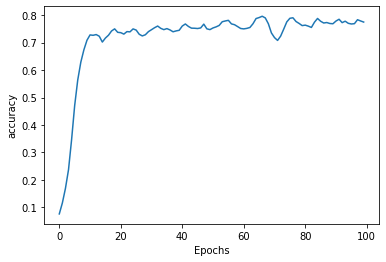

In [19]:
import matplotlib.pyplot as plt

def plot_graphs(history,string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

plot_graphs(history,'accuracy')

In [29]:
seed_text = "Sun is shining and so"
next_words = 100

for _ in range(next_words):
  token_list = tokenizer.texts_to_sequences([seed_text])[0]
  token_list = pad_sequences([token_list],maxlen=max_sequence_len-1,padding= 'pre')
  predicted = model.predict(token_list,verbose=0)
  predicted = np.argmax(predicted,axis=1)
  output_word = "" 
  for word,index in tokenizer.word_index.items():
    if index == predicted:
      output_word = word
      break
  seed_text += " "+ output_word
print(seed_text)




Sun is shining and so good fortune them come when come to me call sinking love your hat your quiet face has taken gone my gone alas gone at this loves like rising barney now in your love him your eyes twinkle bright gone sea sunflower turns thing gone sinking sinking love your sea green and a love a love gone and gone your brow eyes gone sinking love pray love so your love native hover more bravely died eyes whatever milliner fray charming slept gone by love go renownd high threw your breast score green score in help your dead tree eyes to tree
